<a href="https://colab.research.google.com/github/dcthyun0308/ESAA/blob/main/YB2%EC%A1%B0_%EB%B0%A9%ED%95%99%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%9D%B4%EC%84%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import shutil
import os

# 1. 나눔 폰트 설치
!apt-get -qq -y install fonts-nanum > /dev/null

# 2. 캐시 디렉토리가 존재할 때만 삭제 (에러 방지)
cache_dir = mpl.get_cachedir()
if os.path.exists(cache_dir):
    shutil.rmtree(cache_dir)

# 3. 나눔바른고딕(NanumBarunGothic) 경로 설정 및 적용
# 설치 위치에 따라 'NanumGothic.ttf' 또는 'NanumBarunGothic.ttf'를 선택하세요.
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 4. 그래프 선명도 설정
%config InlineBackend.figure_format = 'retina'

print(f"설정된 폰트: {plt.rcParams['font.family']}")
print("이제 에러 없이 한글 그래프를 그리실 수 있습니다.")

설정된 폰트: ['NanumBarunGothic']
이제 에러 없이 한글 그래프를 그리실 수 있습니다.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train = pd.read_csv('/content/drive/MyDrive/ESAA/YB_V/train.csv')

In [6]:
train.head()

,영업일자,영업장명_메뉴명,매출수량
0,2023-01-01,느티나무 셀프BBQ_1인 수저세트,0
1,2023-01-02,느티나무 셀프BBQ_1인 수저세트,0
2,2023-01-03,느티나무 셀프BBQ_1인 수저세트,0
3,2023-01-04,느티나무 셀프BBQ_1인 수저세트,0
4,2023-01-05,느티나무 셀프BBQ_1인 수저세트,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102676 entries, 0 to 102675
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   영업일자      102676 non-null  object
 1   영업장명_메뉴명  102676 non-null  object
 2   매출수량      102676 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.4+ MB


In [8]:
train['영업장명_메뉴명'].value_counts()

,count
영업장명_메뉴명,
느티나무 셀프BBQ_1인 수저세트,532
느티나무 셀프BBQ_BBQ55(단체),532
"느티나무 셀프BBQ_대여료 30,000원",532
"느티나무 셀프BBQ_대여료 60,000원",532
"느티나무 셀프BBQ_대여료 90,000원",532
...,...
화담숲카페_메밀미숫가루,532
화담숲카페_아메리카노 HOT,532
화담숲카페_아메리카노 ICE,532


In [9]:
print(train['영업장명_메뉴명'].value_counts().to_string())

영업장명_메뉴명
느티나무 셀프BBQ_1인 수저세트                    532
느티나무 셀프BBQ_BBQ55(단체)                  532
느티나무 셀프BBQ_대여료 30,000원                532
느티나무 셀프BBQ_대여료 60,000원                532
느티나무 셀프BBQ_대여료 90,000원                532
느티나무 셀프BBQ_본삼겹 (단품,실내)                532
느티나무 셀프BBQ_스프라이트 (단체)                 532
느티나무 셀프BBQ_신라면                        532
느티나무 셀프BBQ_쌈야채세트                      532
느티나무 셀프BBQ_쌈장                         532
느티나무 셀프BBQ_육개장 사발면                    532
느티나무 셀프BBQ_일회용 소주컵                    532
느티나무 셀프BBQ_일회용 종이컵                    532
느티나무 셀프BBQ_잔디그늘집 대여료 (12인석)           532
느티나무 셀프BBQ_잔디그늘집 대여료 (6인석)            532
느티나무 셀프BBQ_잔디그늘집 의자 추가                532
느티나무 셀프BBQ_참이슬 (단체)                   532
느티나무 셀프BBQ_친환경 접시 14cm                532
느티나무 셀프BBQ_친환경 접시 23cm                532
느티나무 셀프BBQ_카스 병(단체)                   532
느티나무 셀프BBQ_콜라 (단체)                    532
느티나무 셀프BBQ_햇반                         532
느티나무 셀프BBQ_허브솔트                       532
담하_(단체) 공깃밥              

In [10]:
print(train['매출수량'].describe())

count    102676.000000
mean         10.653083
std          41.887692
min         -80.000000
25%           0.000000
50%           0.000000
75%           4.000000
max        1372.000000
Name: 매출수량, dtype: float64


음수 데이터 확인

In [11]:
negative_sales = train[train['매출수량'] < 0]
print(f"\n### 3. 음수 데이터 확인 ###")
print(f"음수 데이터 개수: {len(negative_sales)}개")
if len(negative_sales) > 0:
    print(negative_sales.head())


### 3. 음수 데이터 확인 ###
음수 데이터 개수: 14개
             영업일자                영업장명_메뉴명  매출수량
1837   2023-08-30  느티나무 셀프BBQ_대여료 60,000원    -1
3453   2023-09-19   느티나무 셀프BBQ_스프라이트 (단체)   -18
55068  2023-09-30        미라시아_브런치 4인 패키지     -1
56134  2023-10-02         미라시아_브런치(대인) 주중    -5
64507  2023-05-16           연회장_Cass Beer   -18


In [22]:
# 1. 삭제 전 음수 데이터 개수 확인 (정말 14건인지 체크)
negative_count = len(train[train['매출수량'] < 0])
print(f"삭제 전 음수 데이터 개수: {negative_count}건")

# 2. 음수 데이터를 제외하고 데이터프레임 갱신
train = train[train['매출수량'] >= 0]

# 3. 삭제 후 결과 확인
print(f"삭제 후 남은 데이터 수: {len(train)}건")
print(f"현재 음수 데이터 개수: {len(train[train['매출수량'] < 0])}건")

삭제 전 음수 데이터 개수: 14건
삭제 후 남은 데이터 수: 102662건
현재 음수 데이터 개수: 0건


0인 데이터

In [12]:
zero_sales = train[train['매출수량'] == 0]
print(f"\n### 4. 매출수량이 0인 데이터 확인 ###")
print(f"매출수량 0 개수: {len(zero_sales)}개")


### 4. 매출수량이 0인 데이터 확인 ###
매출수량 0 개수: 54034개


In [13]:
train['매출수량'].agg(['count', 'size', 'sum'])

,매출수량
count,102676
size,102676
sum,1093816


요일별 칼럼 추출

In [14]:
# 1. 날짜 데이터로 변환
train['영업일자'] = pd.to_datetime(train['영업일자'])

# 2. 요일 컬럼 생성 (0=월, 1=화, ..., 6=일)
train['요일'] = train['영업일자'].dt.dayofweek

# 3. 요일별 전체 매출수량 합계 확인
train.groupby('요일')['매출수량'].sum()

,매출수량
요일,
0,113822
1,125056
2,118284
3,146288
4,179758
5,224064
6,186544


In [15]:
# 요일 번호를 이름으로 바꾸는 딕셔너리
day_map = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
train['요일명'] = train['요일'].map(day_map)

# 확인용
print(train.groupby('요일명')['매출수량'].sum().reindex(['월', '화', '수', '목', '금', '토', '일']))

요일명
월    113822
화    125056
수    118284
목    146288
금    179758
토    224064
일    186544
Name: 매출수량, dtype: int64


1. 주중, 주말 패턴 분석

1) 중앙값과 평균

/tmp/ipython-input-1307803771.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  median_diff = usage_stats.loc[usage_stats['주말여부']=='주말', 'median'].values[0] / usage_stats.loc[usage_stats['주말여부']=='주중', 'median'].values[0]


### 주중/주말 매출 체급 분석 결과 ###
  주말여부       mean  median        std  count
0   주말  13.416189     1.0  51.252332  44004
1   주중   8.580754     0.0  33.021576  58672

평균 기준 체급 차이: 약 1.56배
중앙값 기준 체급 차이: 약 inf배


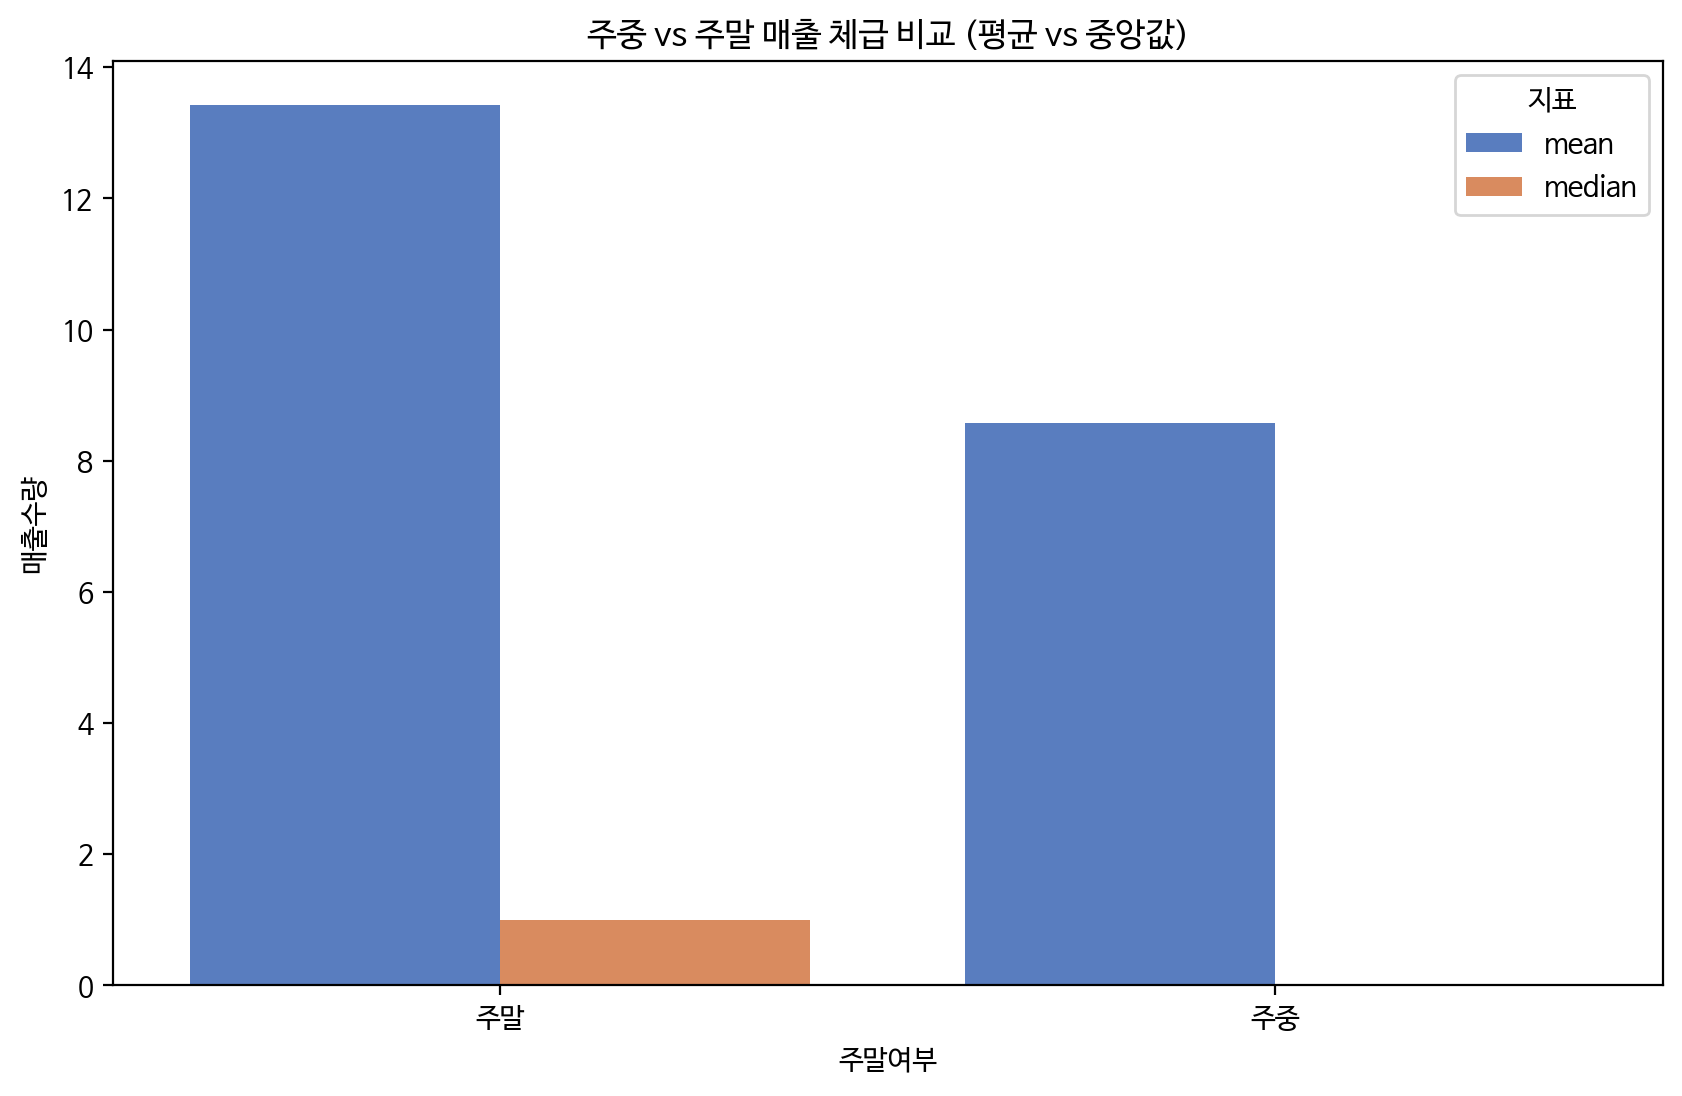

In [18]:
# 1. 기초 통계량 계산 (평균 vs 중앙값)
# '주말여부'는 금토일을 주말로 가정한 기준입니다.
usage_stats = train.groupby('주말여부')['매출수량'].agg(['mean', 'median', 'std', 'count']).reset_index()

# 2. 체급 차이 계산 (주말이 주중보다 몇 배 더 높은가?)
mean_diff = usage_stats.loc[usage_stats['주말여부']=='주말', 'mean'].values[0] / usage_stats.loc[usage_stats['주말여부']=='주중', 'mean'].values[0]
median_diff = usage_stats.loc[usage_stats['주말여부']=='주말', 'median'].values[0] / usage_stats.loc[usage_stats['주말여부']=='주중', 'median'].values[0]

print("### 주중/주말 매출 체급 분석 결과 ###")
print(usage_stats)
print(f"\n평균 기준 체급 차이: 약 {mean_diff:.2f}배")
print(f"중앙값 기준 체급 차이: 약 {median_diff:.2f}배")

# 3. 시각화 (평균과 중앙값을 동시에 비교)
plt.figure(figsize=(10, 6))
melted_stats = usage_stats.melt(id_vars='주말여부', value_vars=['mean', 'median'], var_name='지표', value_name='수량')

sns.barplot(data=melted_stats, x='주말여부', y='수량', hue='지표', palette='muted')
plt.title('주중 vs 주말 매출 체급 비교 (평균 vs 중앙값)')
plt.ylabel('매출수량')
plt.show()

In [20]:
# 1. 주중 데이터만 필터링
weekday_data = train[train['주말여부'] == '주중']
weekend_data = train[train['주말여부'] == '주말']

# 2. 주중 0 판매량 계산
weekday_total = len(weekday_data)
weekday_zero = len(weekday_data[weekday_data['매출수량'] == 0])
weekday_zero_ratio = (weekday_zero / weekday_total) * 100

# 3. 주말 0 판매량 계산 (비교용)
weekend_total = len(weekend_data)
weekend_zero = len(weekend_data[weekend_data['매출수량'] == 0])
weekend_zero_ratio = (weekend_zero / weekend_total) * 100

print(f"--- [주중(월-목) 판매량 0 분석] ---")
print(f"전체 데이터 수: {weekday_total:,}건")
print(f"판매량이 0인 건수: {weekday_zero:,}건")
print(f"판매량 0의 비중: {weekday_zero_ratio:.2f}%")

print(f"\n--- [주말(금-일) 판매량 0 분석] ---")
print(f"전체 데이터 수: {weekend_total:,}건")
print(f"판매량이 0인 건수: {weekend_zero:,}건")
print(f"판매량 0의 비중: {weekend_zero_ratio:.2f}%")

--- [주중(월-목) 판매량 0 분석] ---
전체 데이터 수: 58,672건
판매량이 0인 건수: 33,905건
판매량 0의 비중: 57.79%

--- [주말(금-일) 판매량 0 분석] ---
전체 데이터 수: 44,004건
판매량이 0인 건수: 20,129건
판매량 0의 비중: 45.74%


주중의 0의 비율이 50%가 넘음

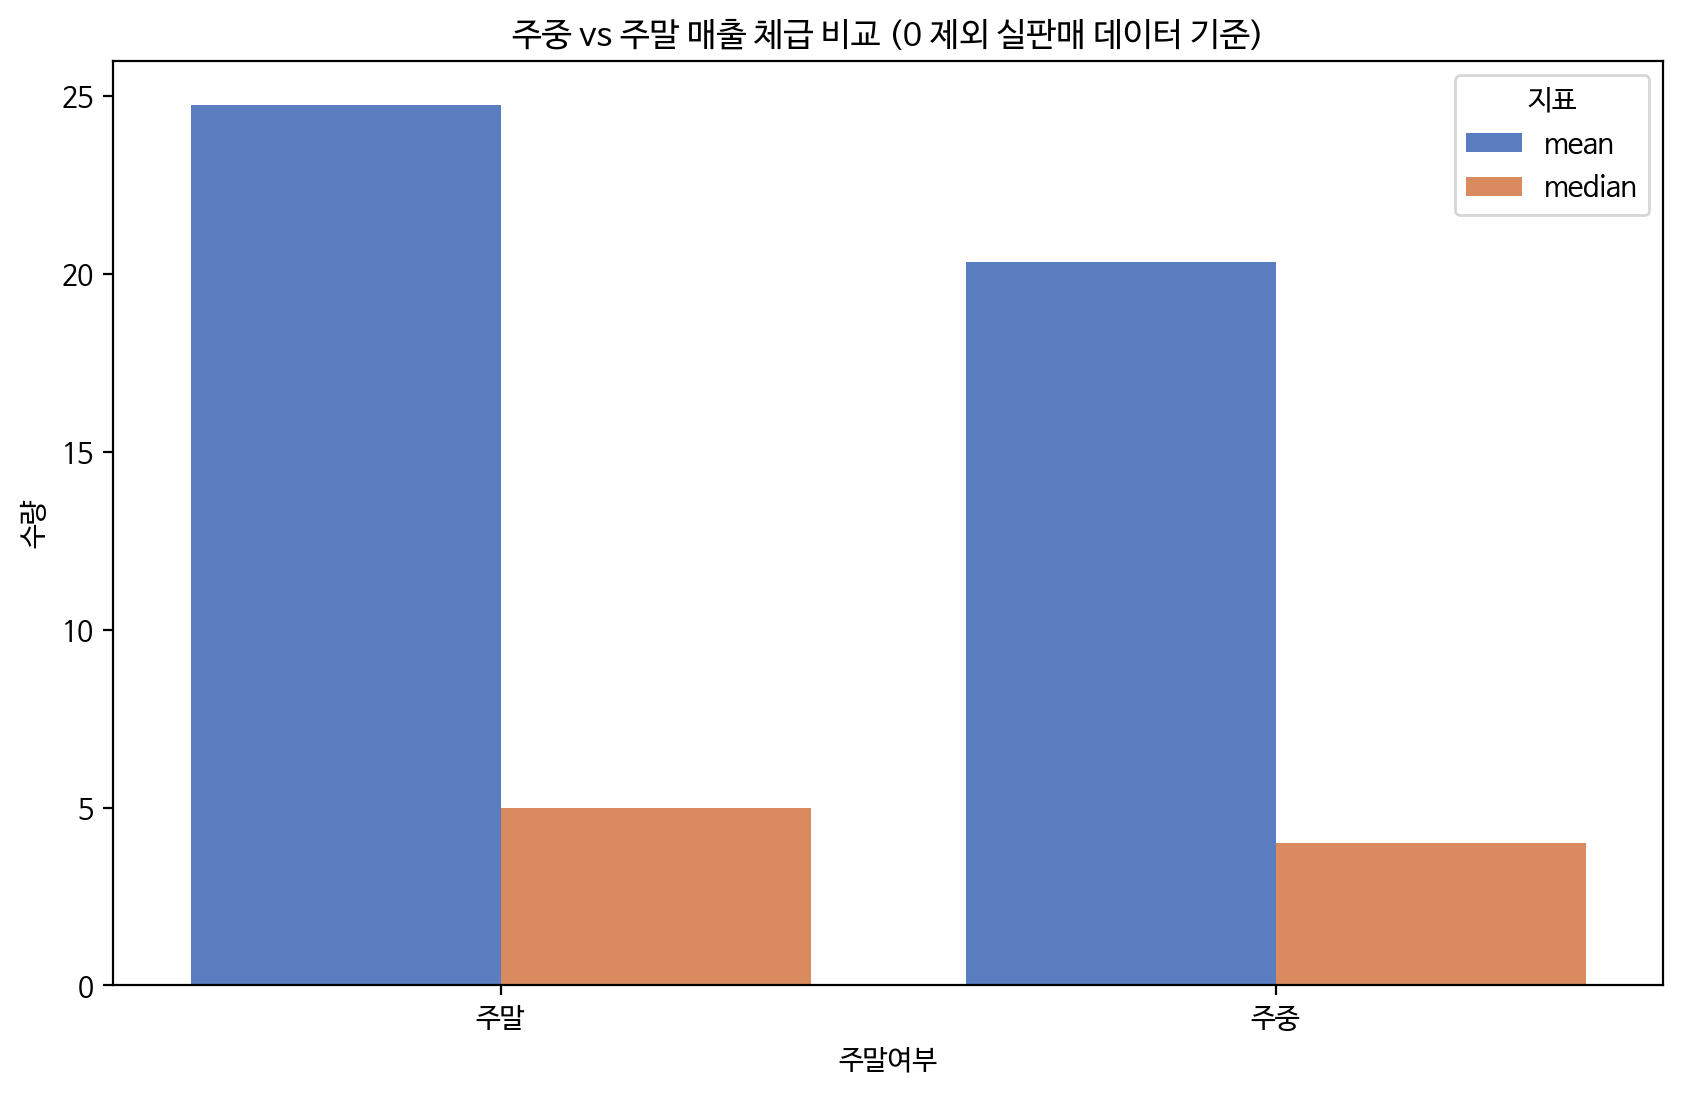

### 0을 제외한 실제 판매 발생 건 기준 ###
  주말여부       mean  median        std  count
0   주말  24.735252     5.0  67.549741  23868
1   주중  20.339216     4.0  48.419303  24760


In [19]:
# 매출수량이 0보다 큰 데이터만 추출하여 다시 분석
train_positive = train[train['매출수량'] > 0]

# 필터링된 데이터로 기초 통계량 계산
usage_stats_pos = train_positive.groupby('주말여부')['매출수량'].agg(['mean', 'median', 'std', 'count']).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
melted_stats_pos = usage_stats_pos.melt(id_vars='주말여부', value_vars=['mean', 'median'], var_name='지표', value_name='수량')

sns.barplot(data=melted_stats_pos, x='주말여부', y='수량', hue='지표', palette='muted')
plt.title('주중 vs 주말 매출 체급 비교 (0 제외 실판매 데이터 기준)')
plt.show()

print("### 0을 제외한 실제 판매 발생 건 기준 ###")
print(usage_stats_pos)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipython-input-988548948.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['log_매출수량'] = np.log1p(train_filtered['매출수량'])


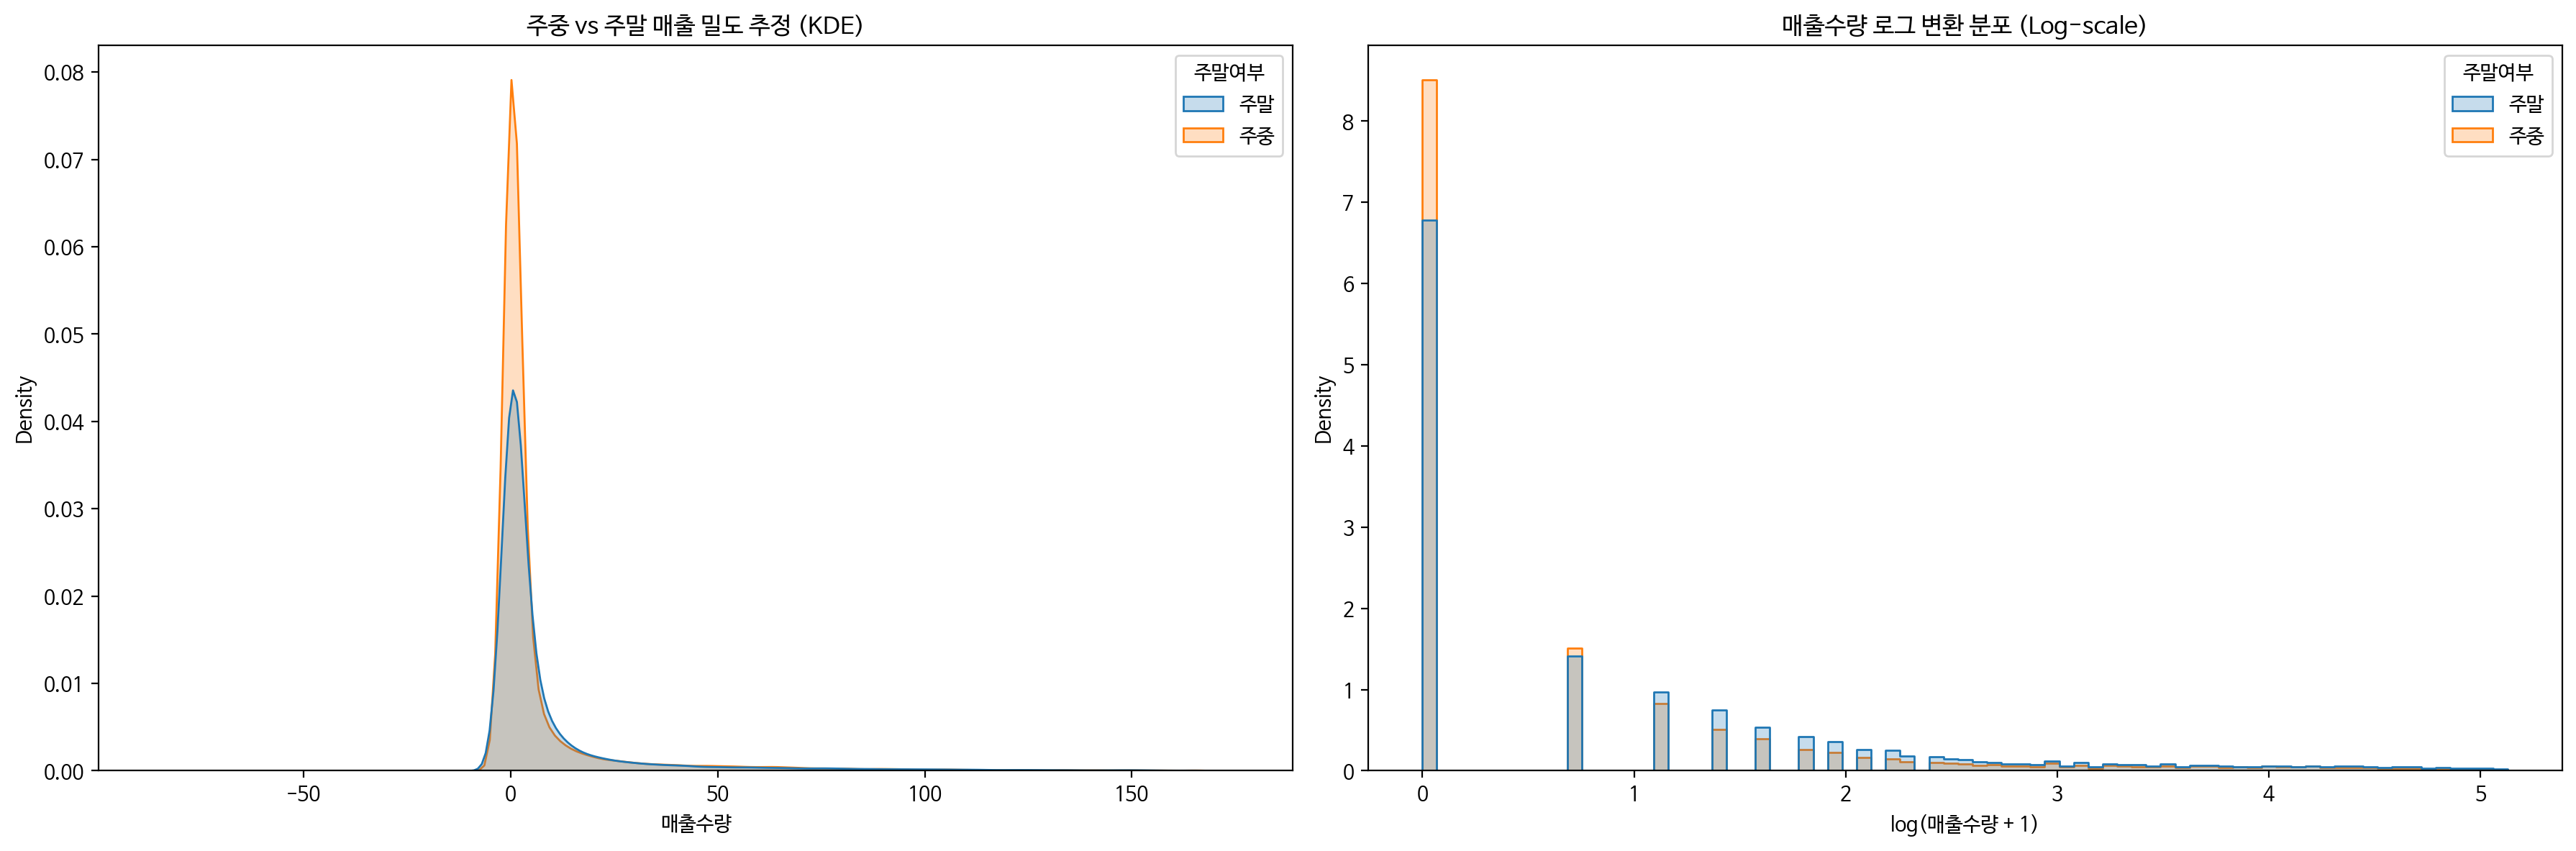

주중 매출 왜도: 9.45
주말 매출 왜도: 10.33


In [21]:
# 1. 상위 1% 극단적 이상치를 제외한 데이터 생성 (꼬리를 더 자세히 보기 위함)
limit = train['매출수량'].quantile(0.99)
train_filtered = train[train['매출수량'] <= limit]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# [그래프 A] 전체적인 분포 곡선 비교 (KDE Plot)
sns.kdeplot(data=train_filtered, x='매출수량', hue='주말여부', fill=True, ax=axes[0])
axes[0].set_title('주중 vs 주말 매출 밀도 추정 (KDE)')
axes[0].set_xlabel('매출수량')

# [그래프 B] 로그 변환 분포 (0 근처에 몰린 데이터를 펼쳐서 보기 위함)
# 0 값이 많으므로 log(x+1)을 사용합니다.
train_filtered['log_매출수량'] = np.log1p(train_filtered['매출수량'])
sns.histplot(data=train_filtered, x='log_매출수량', hue='주말여부', element='step', stat='density', common_norm=False, ax=axes[1])
axes[1].set_title('매출수량 로그 변환 분포 (Log-scale)')
axes[1].set_xlabel('log(매출수량 + 1)')

plt.tight_layout()
plt.show()

# 2. 왜도(Skewness) 수치 계산
print(f"주중 매출 왜도: {train[train['주말여부'] == '주중']['매출수량'].skew():.2f}")
print(f"주말 매출 왜도: {train[train['주말여부'] == '주말']['매출수량'].skew():.2f}")

2, 요일별 메뉴 선호도

### 요일별 인기 메뉴 TOP 5 ###

[월요일]
영업장명_메뉴명
포레스트릿_꼬치어묵         8199
포레스트릿_떡볶이          6850
미라시아_브런치(대인) 주중    4399
포레스트릿_생수           4136
화담숲주막_해물파전         3746
Name: 월, dtype: int64

[화요일]
영업장명_메뉴명
화담숲주막_해물파전            7586
포레스트릿_꼬치어묵            6286
카페테리아_단체식 18000(신)    5543
포레스트릿_떡볶이             5135
포레스트릿_생수              3960
Name: 화, dtype: int64

[수요일]
영업장명_메뉴명
화담숲주막_해물파전            6835
포레스트릿_꼬치어묵            5845
포레스트릿_떡볶이             5061
카페테리아_단체식 18000(신)    4933
미라시아_브런치(대인) 주중       3828
Name: 수, dtype: int64

[목요일]
영업장명_메뉴명
화담숲주막_해물파전              7065
포레스트릿_꼬치어묵              7033
카페테리아_단체식 18000(신)      6129
포레스트릿_떡볶이               5914
느티나무 셀프BBQ_BBQ55(단체)    5377
Name: 목, dtype: int64

[금요일]
영업장명_메뉴명
포레스트릿_꼬치어묵            10846
포레스트릿_떡볶이              8878
화담숲주막_해물파전             8618
카페테리아_단체식 13000(신)     7455
포레스트릿_생수               7099
Name: 금, dtype: int64

[토요일]
영업장명_메뉴명
포레스트릿_꼬치어묵         17065
포레스트릿_떡볶이          13756
화담숲주막_해물파전         13326
포레스트릿_생수           1

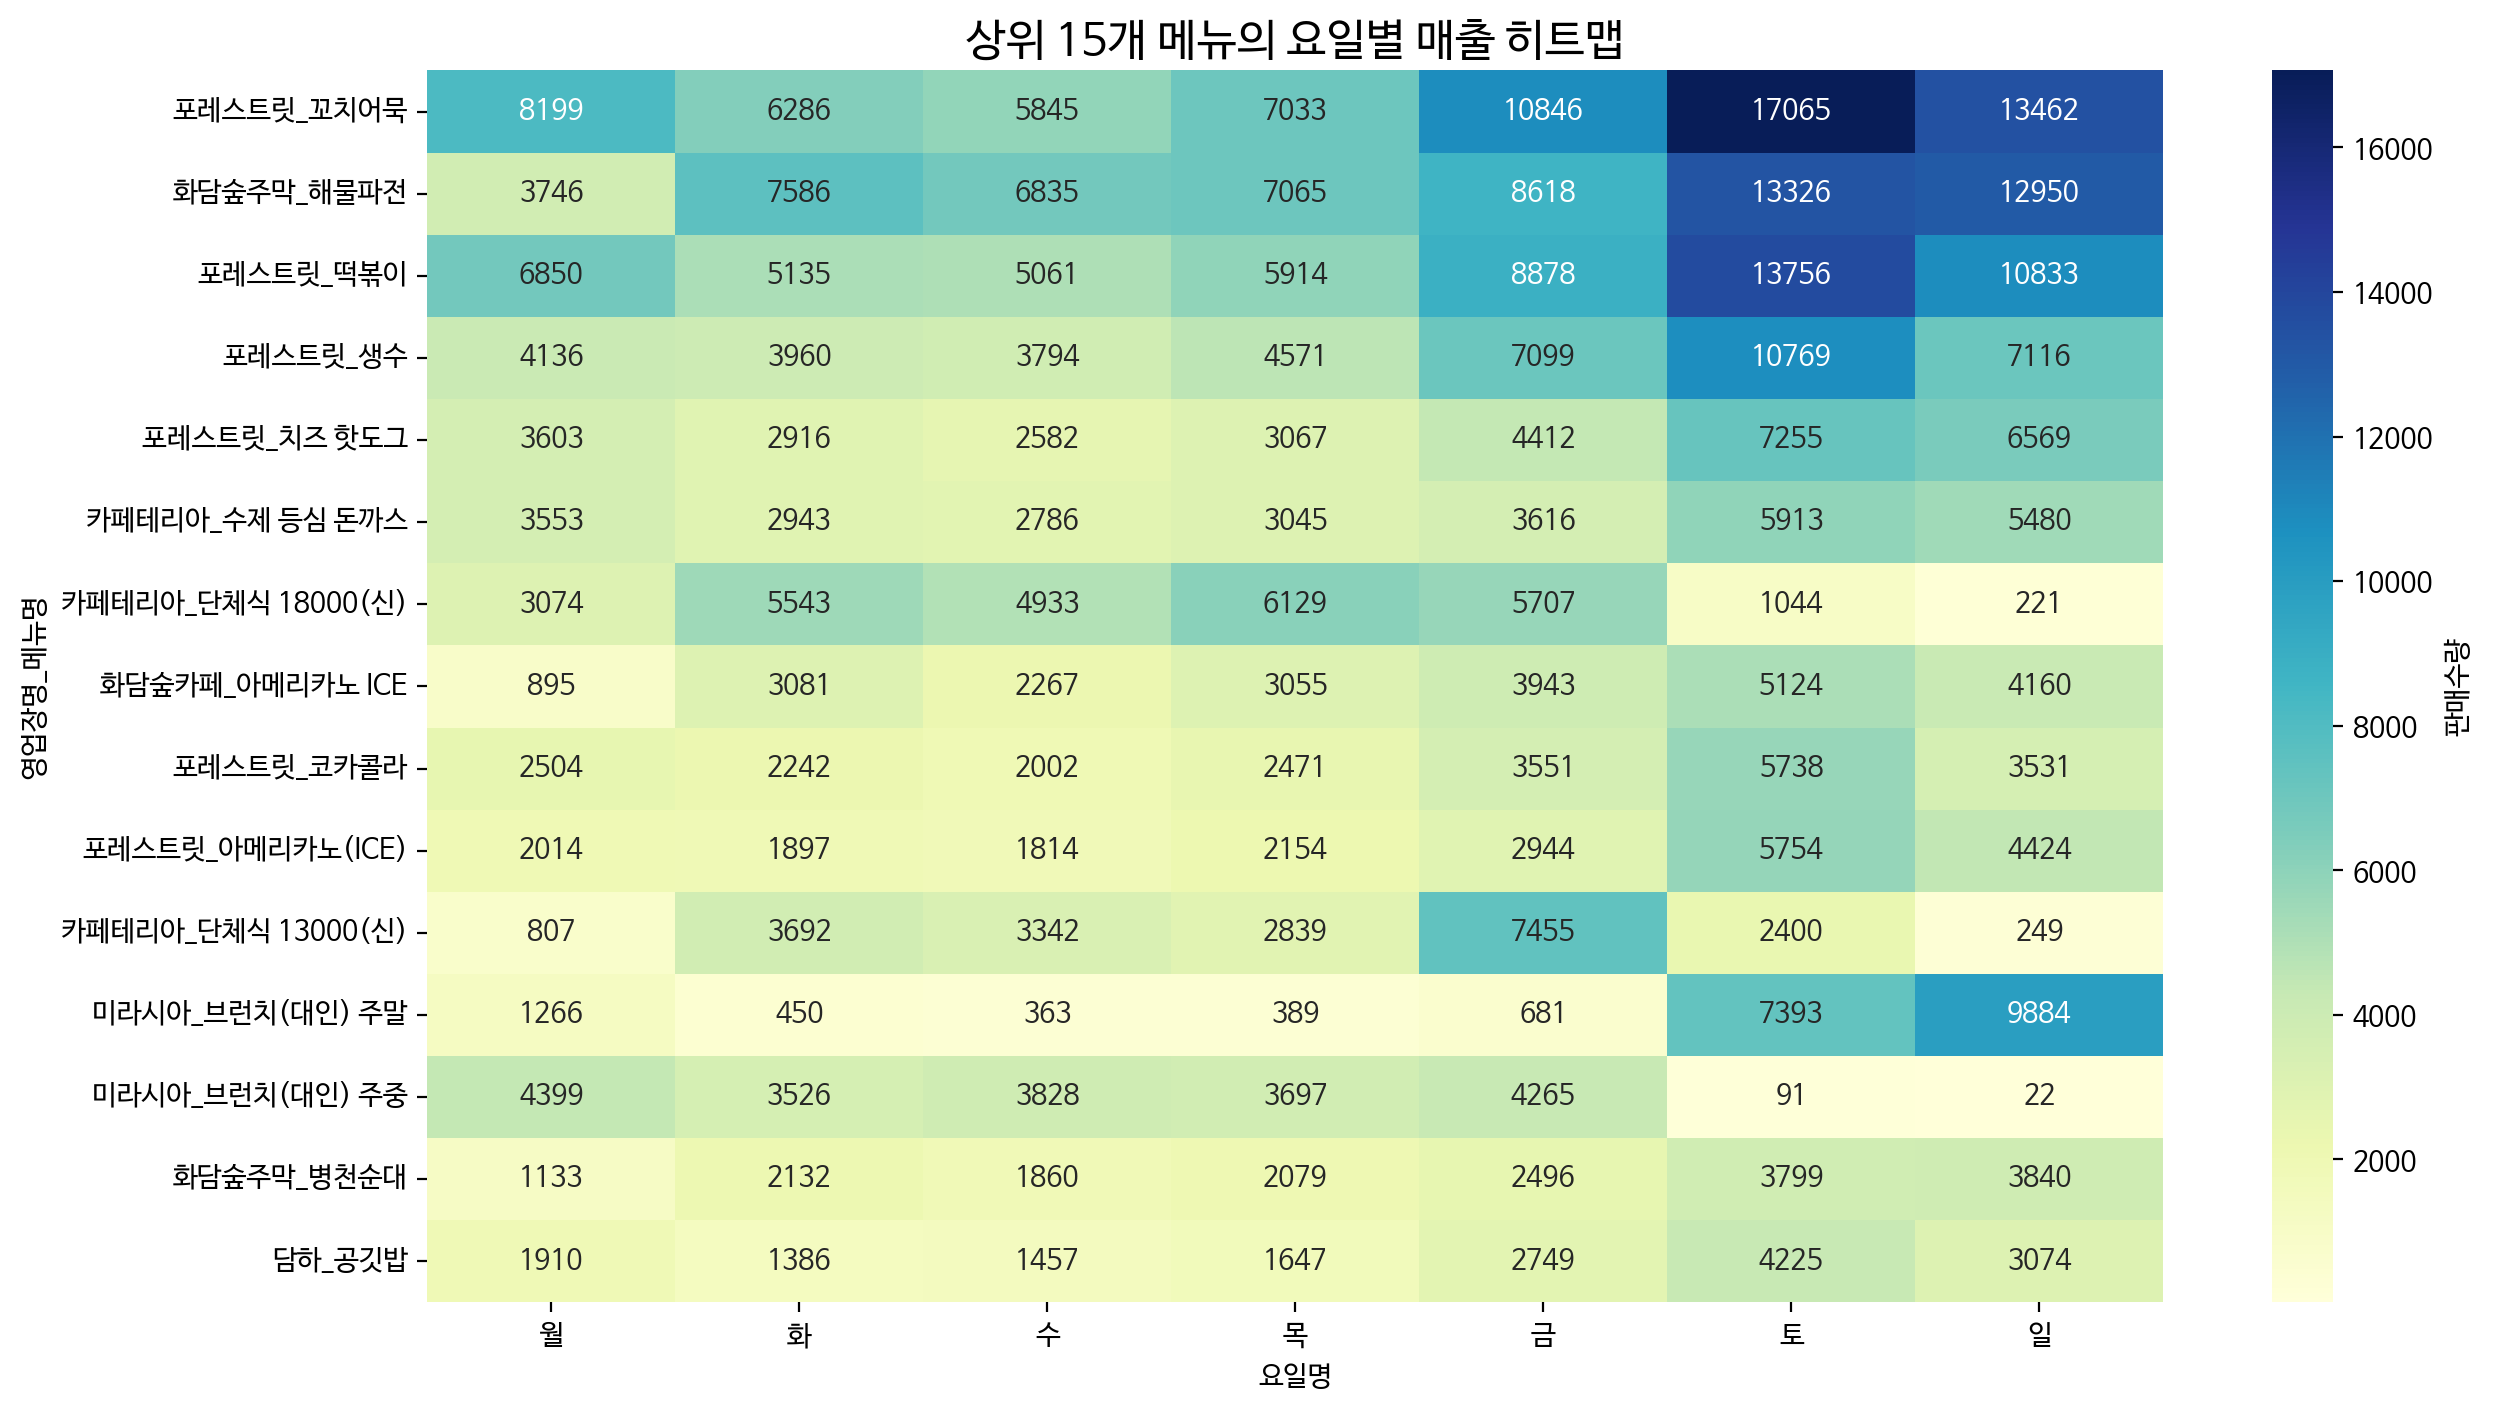

In [23]:
# 1. 요일별 메뉴 매출 합계 계산
menu_day_pivot = train.pivot_table(index='영업장명_메뉴명',
                                   columns='요일명',
                                   values='매출수량',
                                   aggfunc='sum').fillna(0)

# 2. 요일 순서 정렬 (월~일)
menu_day_pivot = menu_day_pivot[['월', '화', '수', '목', '금', '토', '일']]

# 3. 요일별 TOP 5 메뉴 출력
print("### 요일별 인기 메뉴 TOP 5 ###")
for col in menu_day_pivot.columns:
    top5 = menu_day_pivot[col].nlargest(5)
    print(f"\n[{col}요일]")
    print(top5)

# 4. 상위 15개 인기 메뉴의 요일별 집중도 히트맵 시각화
# 전체 매출 기준 상위 15개 메뉴 추출
top15_menu_names = train.groupby('영업장명_메뉴명')['매출수량'].sum().nlargest(15).index
hit_data = menu_day_pivot.loc[top15_menu_names]

plt.figure(figsize=(14, 8))
sns.heatmap(hit_data, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': '판매수량'})
plt.title('상위 15개 메뉴의 요일별 매출 히트맵', fontsize=16)
plt.show()

주말 매출이 평일의 2배. 단체식은 높은 판매량 유지하다가 주말에 감소. 브런치 주말에 10배 이상.

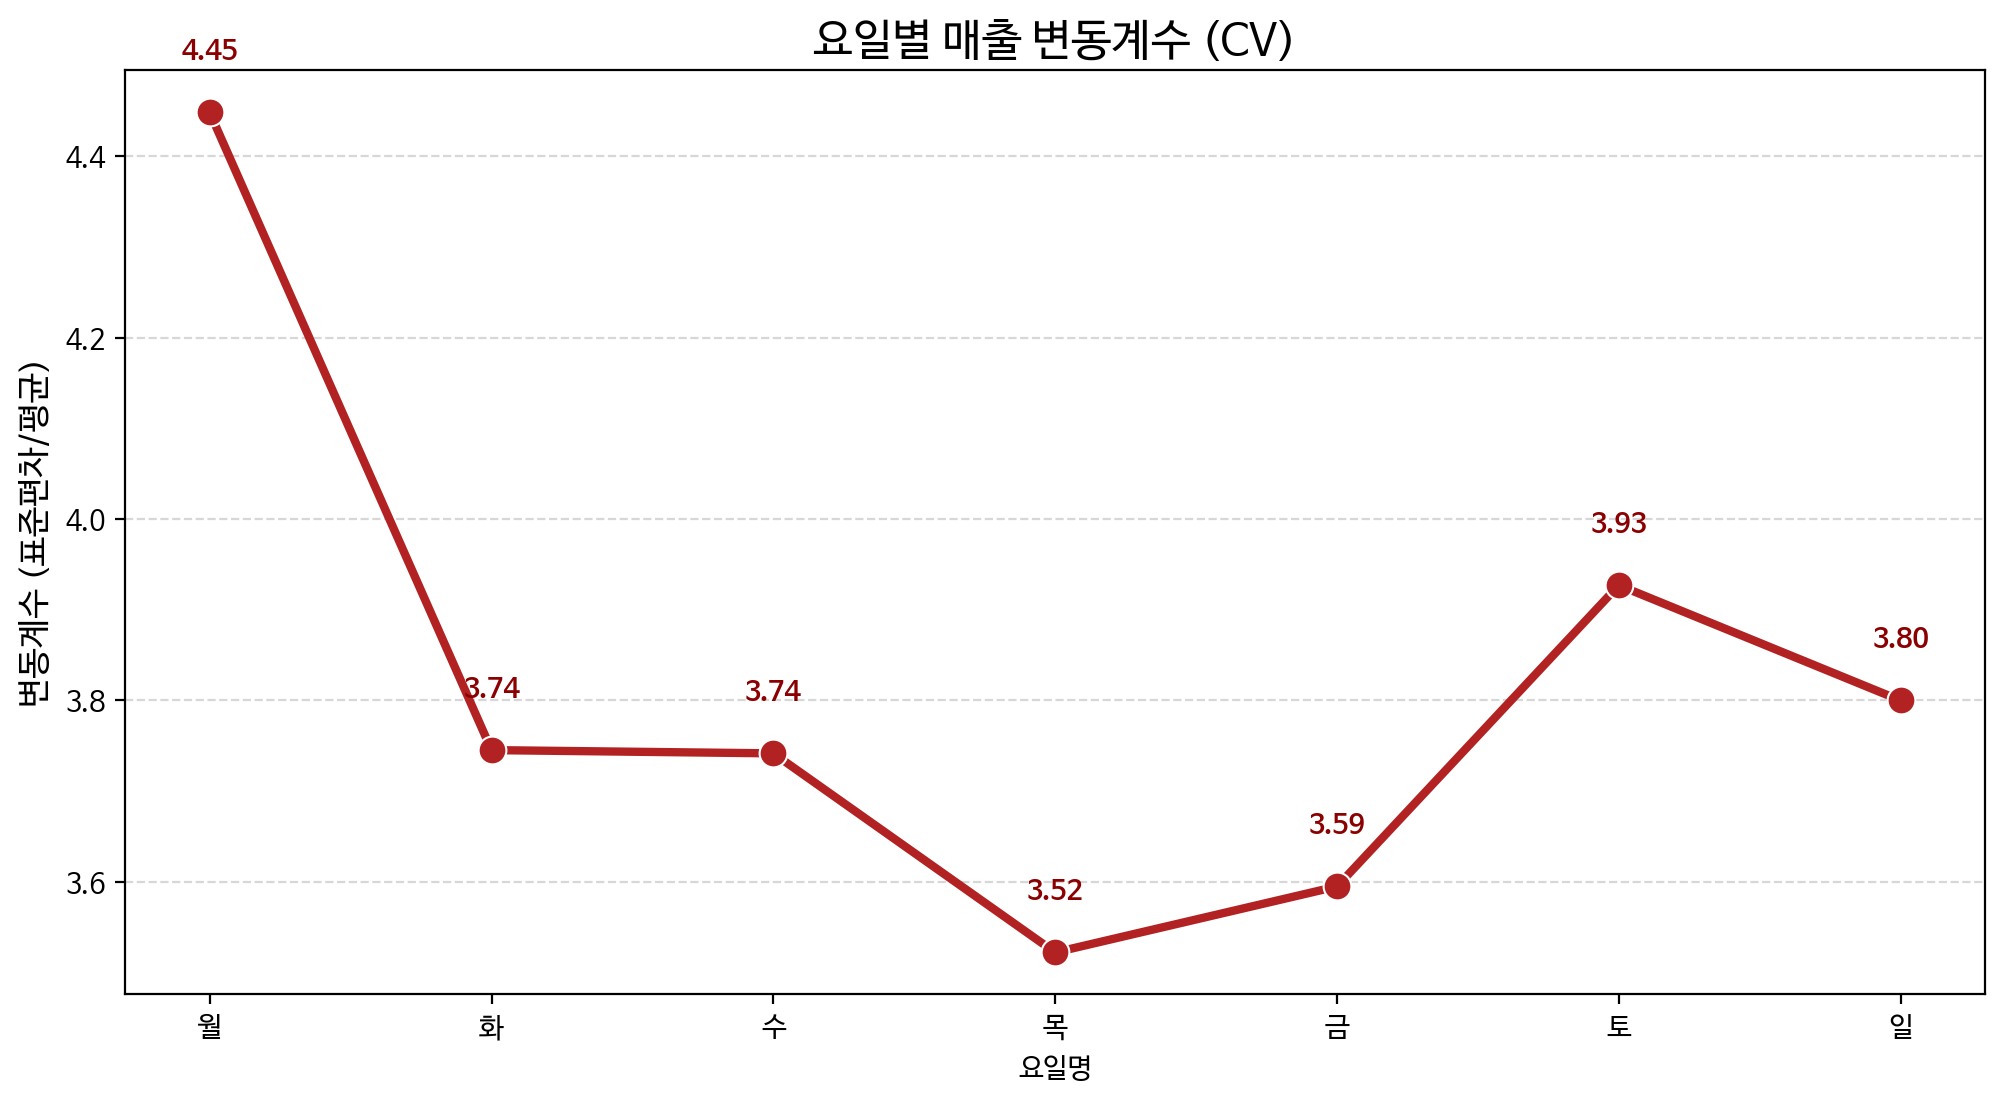

          mean        std      변동계수
요일명                                
월     7.769042  34.559012  4.448298
화     8.530038  31.944432  3.744935
수     8.064703  30.172914  3.741355
목     9.973275  35.123417  3.521754
금    12.256017  44.054486  3.594519
토    15.276812  59.988516  3.926769
일    12.722976  48.343695  3.799716


In [24]:
# 1. 요일별 기초 통계량 계산
volatility_stats = train.groupby('요일명')['매출수량'].agg(['mean', 'std']).reindex(['월', '화', '수', '목', '금', '토', '일'])

# 2. 변동계수(CV) 산출
volatility_stats['변동계수'] = volatility_stats['std'] / volatility_stats['mean']

# 3. 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=volatility_stats, x=volatility_stats.index, y='변동계수', marker='o', color='firebrick', linewidth=3, markersize=10)

# 값 표시
for i, val in enumerate(volatility_stats['변동계수']):
    plt.text(i, val + 0.05, f'{val:.2f}', ha='center', va='bottom', fontweight='bold', color='darkred')

plt.title('요일별 매출 변동계수 (CV)', fontsize=16)
plt.ylabel('변동계수 (표준편차/평균)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

print(volatility_stats)

월요일의 변동계수가 높은 것은, 매출의 절대량이 많아서가 아니라 평균 대비 편차가 극심하기 때문. 이는 월요일 매출이 특정 이벤트(단체 예약 등)에 극단적으로 의존하고 있음을 의미하며, 단순 시계열 예측보다는 이벤트 기반의 피처 엔지니어링이 필수적인 요일임을 시사.

In [25]:
# 1. 일요일과 월요일 데이터만 추출
sun_mon_df = train[train['요일명'].isin(['일', '월'])]

# 2. 요일별 메뉴 매출 합계 계산
comparison = sun_mon_df.groupby(['요일명', '영업장명_메뉴명'])['매출수량'].sum().reset_index()

# 3. 요일별로 랭킹 매기기
comparison['순위'] = comparison.groupby('요일명')['매출수량'].rank(ascending=False, method='min')

# 4. 일요일 TOP 10과 월요일 TOP 10 비교 테이블 생성
sun_top10 = comparison[comparison['요일명']=='일'].sort_values('순위').head(10)[['영업장명_메뉴명', '매출수량']]
mon_top10 = comparison[comparison['요일명']=='월'].sort_values('순위').head(10)[['영업장명_메뉴명', '매출수량']]

# 인덱스를 1~10으로 맞춰서 나란히 보기
sun_top10.index = range(1, 11)
mon_top10.index = range(1, 11)

print("### [일요일 vs 월요일] 인기 메뉴 TOP 10 비교 ###")
result = pd.concat([sun_top10, mon_top10], axis=1)
result.columns = ['일요일 메뉴', '일요일 수량', '월요일 메뉴', '월요일 수량']
display(result)

### [일요일 vs 월요일] 인기 메뉴 TOP 10 비교 ###


,일요일 메뉴,일요일 수량,월요일 메뉴,월요일 수량
1,포레스트릿_꼬치어묵,13462,포레스트릿_꼬치어묵,8199
2,화담숲주막_해물파전,12950,포레스트릿_떡볶이,6850
3,포레스트릿_떡볶이,10833,미라시아_브런치(대인) 주중,4399
4,미라시아_브런치(대인) 주말,9884,포레스트릿_생수,4136
5,포레스트릿_생수,7116,화담숲주막_해물파전,3746
6,포레스트릿_치즈 핫도그,6569,포레스트릿_치즈 핫도그,3603
7,카페테리아_수제 등심 돈까스,5480,카페테리아_수제 등심 돈까스,3553
8,포레스트릿_아메리카노(ICE),4424,카페테리아_단체식 18000(신),3074
9,화담숲카페_아메리카노 ICE,4160,포레스트릿_코카콜라,2504
10,화담숲주막_병천순대,3840,카페테리아_돼지고기 김치찌개,2135


/tmp/ipython-input-1997536078.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zero_prob_eda.index, y=zero_prob_eda.values, palette='Greys_r')


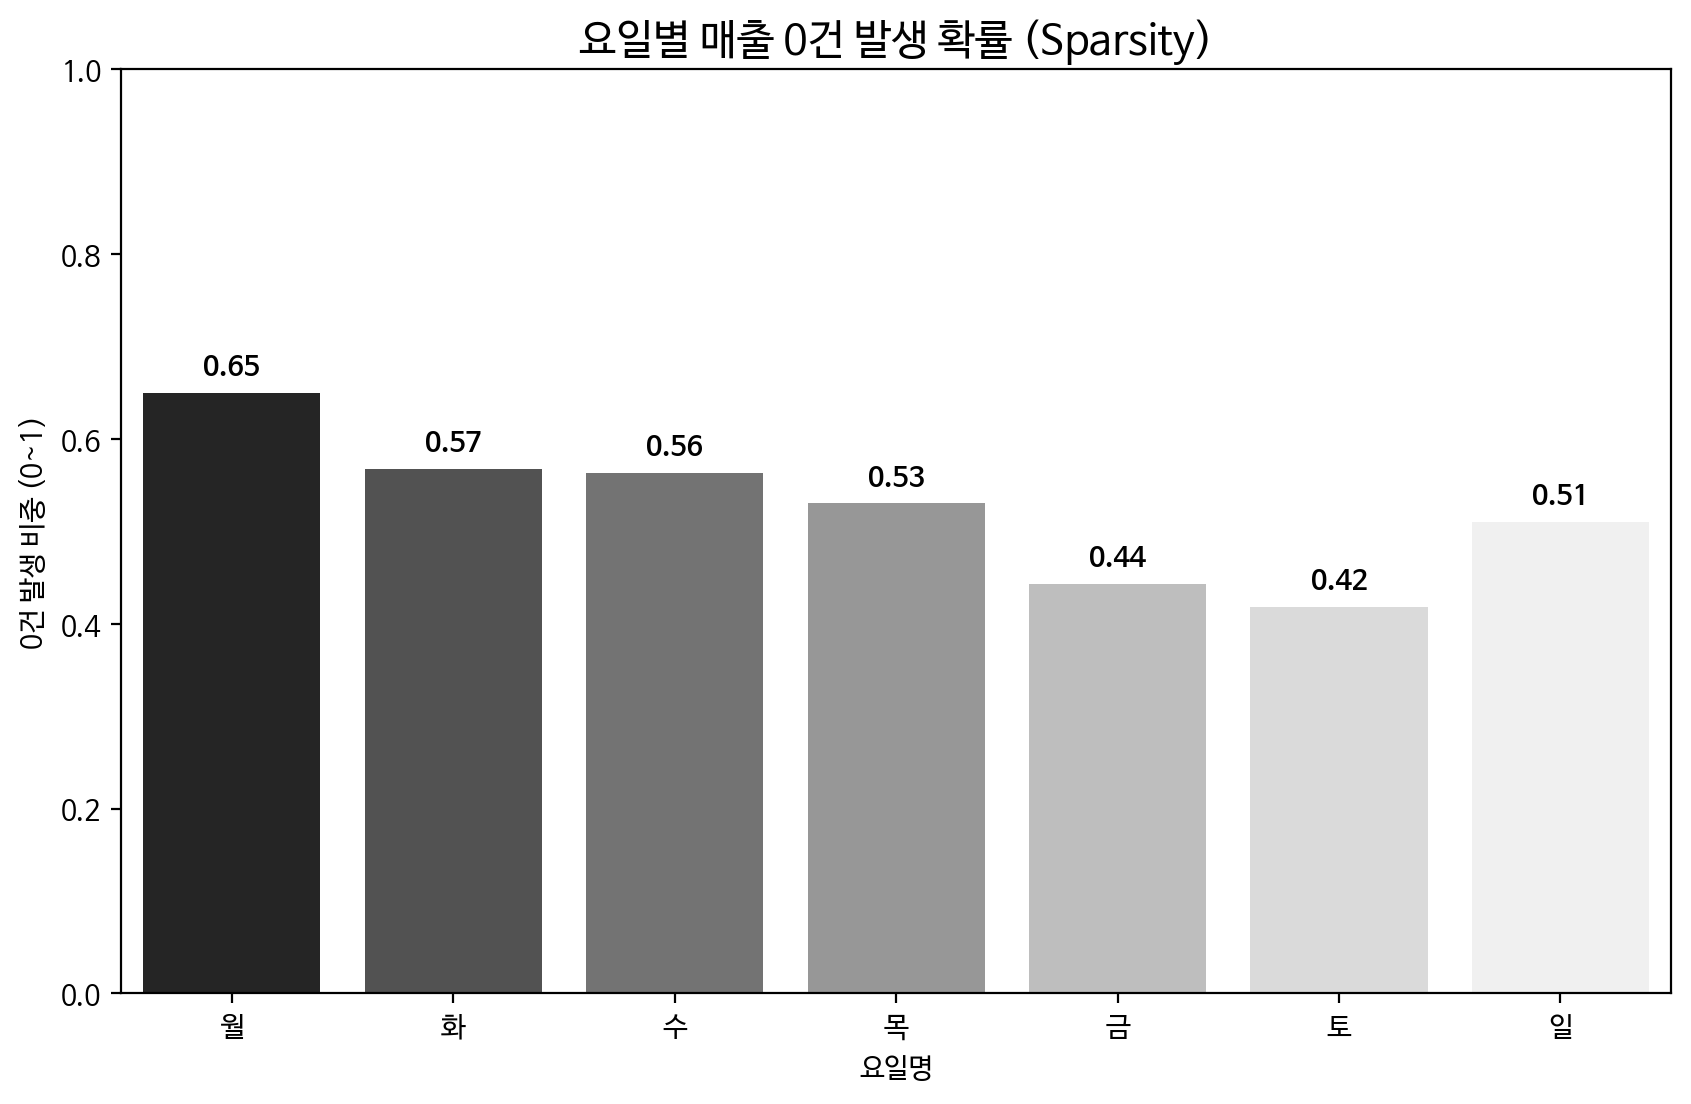

In [31]:
# 1. 매출이 0인 데이터 여부를 나타내는 컬럼 생성
train['is_zero_sales'] = (train['매출수량'] <= 0).astype(int)

# 2. 요일별 '0 판매' 비중 계산
zero_prob_eda = train.groupby('요일명')['is_zero_sales'].mean().reindex(['월', '화', '수', '목', '금', '토', '일'])

# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=zero_prob_eda.index, y=zero_prob_eda.values, palette='Greys_r')
plt.title('요일별 매출 0건 발생 확률 (Sparsity)', fontsize=15)
plt.ylabel('0건 발생 비중 (0~1)')
plt.ylim(0, 1)

# 값 표시
for i, v in enumerate(zero_prob_eda.values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

plt.show()

파생변수 제안
- is_weekend_peak : 주말 유입 지수, 월~목/ 금~일 분류
- mon_event_intensity : 월요일 이상치 강도 지수, (해당 날짜의 매출수량) / (과거 월요일들의 평균 매출수량)